In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Visualize how much the step size will change

In [2]:
alphas = 2 ** np.arange(-15, -2, dtype=np.float32)
betas = np.log(alphas)
grads = [0.01, 0.1, 0.5, 1.0]
meta_step_sizes = [0.01, 0.1, 0.5, 1.0]

# Create lists to store results
data = {
    'alpha': [],
    'alpha_exponent': [],
    'beta': [],
    'grad': [],
    'meta_step_size': [],
    'alpha_frac_change': [],
    'alt_alpha_frac_change': [],
}

for grad in grads:
    for meta_step_size in meta_step_sizes:
        new_betas = betas + meta_step_size * grad * alphas * grad
        new_alphas = np.exp(new_betas)
        alpha_frac_change = (new_alphas - alphas) / alphas
        
        alt_new_betas = betas + meta_step_size / alphas * grad * alphas * grad
        alt_new_alphas = np.exp(alt_new_betas)
        alt_alpha_frac_change = (alt_new_alphas - alphas) / alphas
        
        # Add rows for this parameter combination
        for alpha, beta, frac_change, alt_frac_change in zip(alphas, betas, alpha_frac_change, alt_alpha_frac_change):
            data['alpha'].append(alpha)
            data['alpha_exponent'].append(int(np.log2(alpha)))
            data['beta'].append(beta)
            data['grad'].append(grad)
            data['meta_step_size'].append(meta_step_size)
            data['alpha_frac_change'].append(frac_change)
            data['alt_alpha_frac_change'].append(alt_frac_change)
            

df = pd.DataFrame(data)

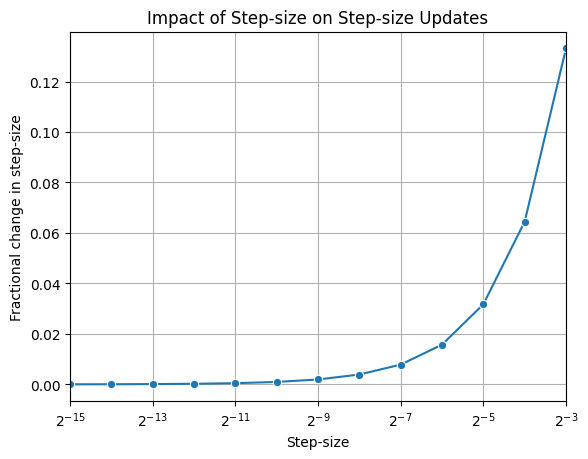

In [3]:
plot_df = df[
    (df['grad'] == 1) &
    (df['meta_step_size'] == 1)
]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alpha_frac_change',
    marker = 'o',
)

plt.title('Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')

plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

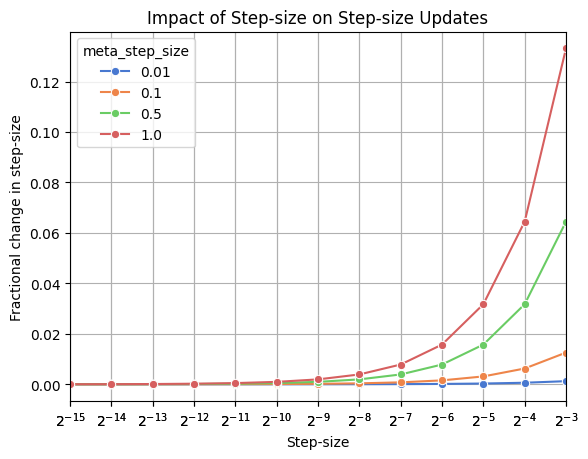

In [4]:
plot_df = df[(df['grad'] == 1)]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alpha_frac_change',
    hue = 'meta_step_size',
    marker = 'o',
    palette = 'muted',
)

plt.title('Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')


plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

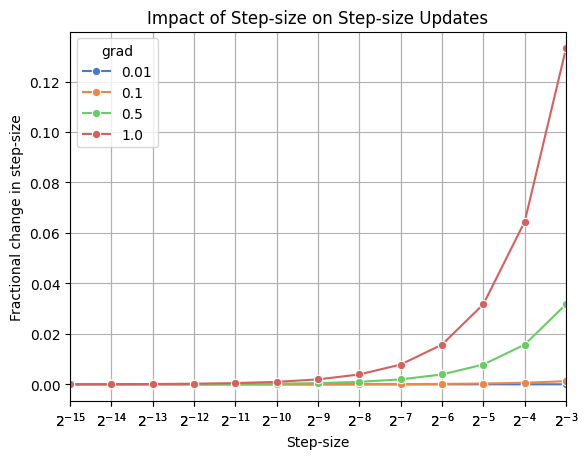

In [5]:
plot_df = df[(df['meta_step_size'] == 1)]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alpha_frac_change',
    hue = 'grad',
    marker = 'o',
    palette = 'muted',
)

plt.title('Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')


plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

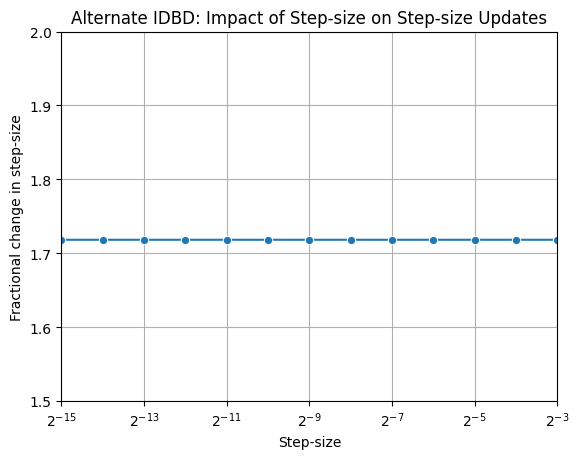

In [17]:
plot_df = df[
    (df['grad'] == 1) &
    (df['meta_step_size'] == 1)
]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alt_alpha_frac_change',
    marker = 'o',
)

plt.title('Alternate IDBD: Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')

plt.xlim(alpha_exponents[0], alpha_exponents[-1])
plt.ylim(1.5, 2.0)

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

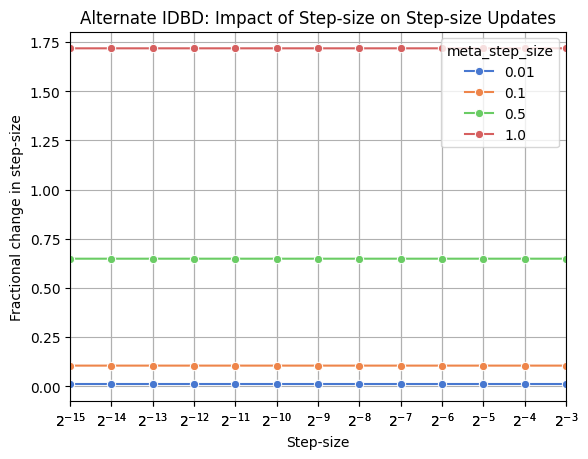

In [18]:
plot_df = df[(df['grad'] == 1)]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alt_alpha_frac_change',
    hue = 'meta_step_size',
    marker = 'o',
    palette = 'muted',
)

plt.title('Alternate IDBD: Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')


plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

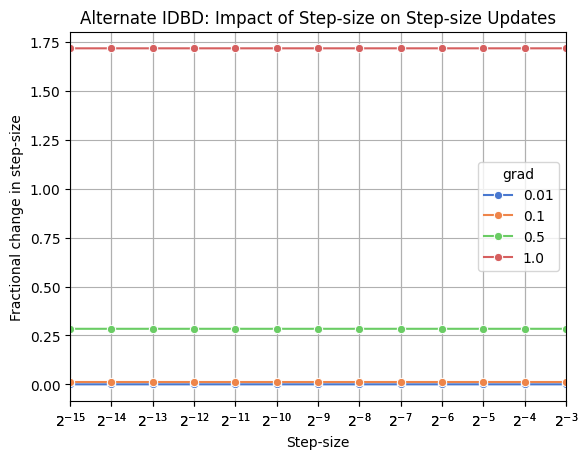

In [20]:
plot_df = df[(df['meta_step_size'] == 1)]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alt_alpha_frac_change',
    hue = 'grad',
    marker = 'o',
    palette = 'muted',
)

plt.title('Alternate IDBD: Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')


plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()